# Hierarchical Clustering of Customer Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Read in the file
fpath = r'C:\Users\L\Documents\Projects\ML\_datasets\mall_customers'
fname = 'Mall_Customers.csv'
f = f'{fpath}/{fname}'
df = pd.read_csv(f)
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
# Encode the gender col to be a binary int
df['gender_coded'] = (df['Gender'] == 'Male').astype(int)
print(df[['Gender', 'gender_coded']])

     Gender  gender_coded
0      Male             1
1      Male             1
2    Female             0
3    Female             0
4    Female             0
..      ...           ...
195  Female             0
196  Female             0
197    Male             1
198    Male             1
199    Male             1

[200 rows x 2 columns]


In [4]:
# Specify the columns to cluster
to_cluster = ['gender_coded', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
n_clusters = 5
X = df[to_cluster].values

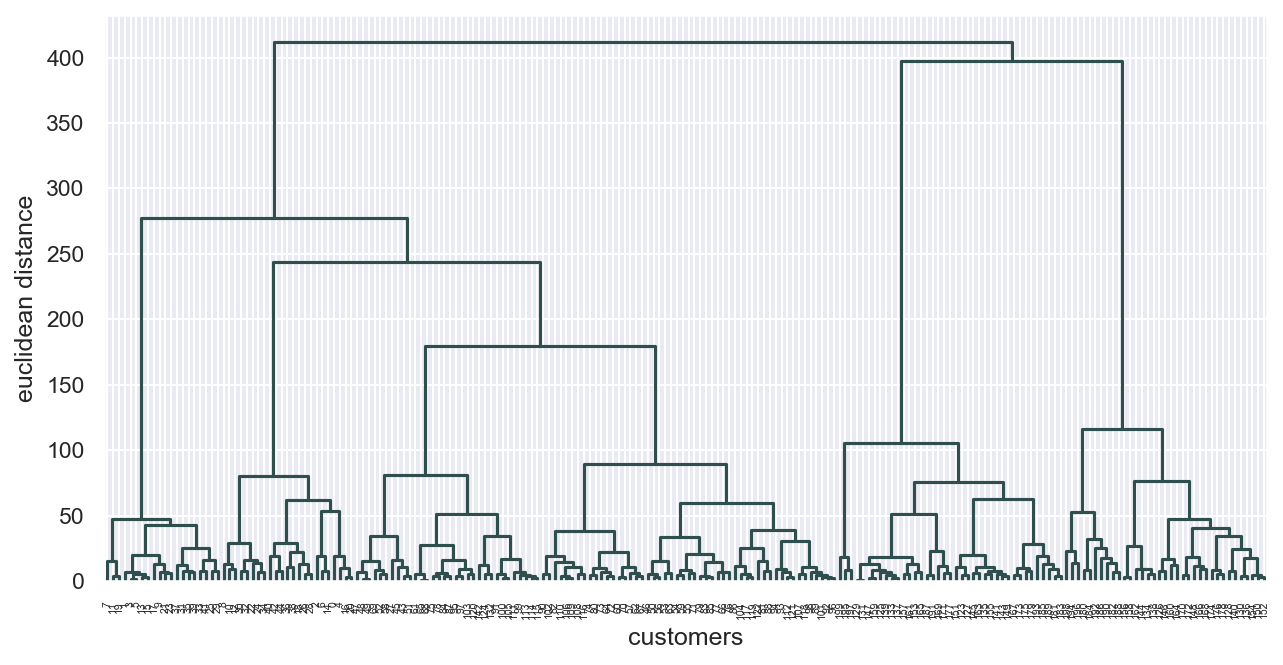

In [5]:
# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10,5), dpi=150)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), color_threshold=0, above_threshold_color='darkslategray', ax=ax)
plt.xlabel('customers')
plt.ylabel('euclidean distance')
plt.show()

In [6]:
# Fit the data
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

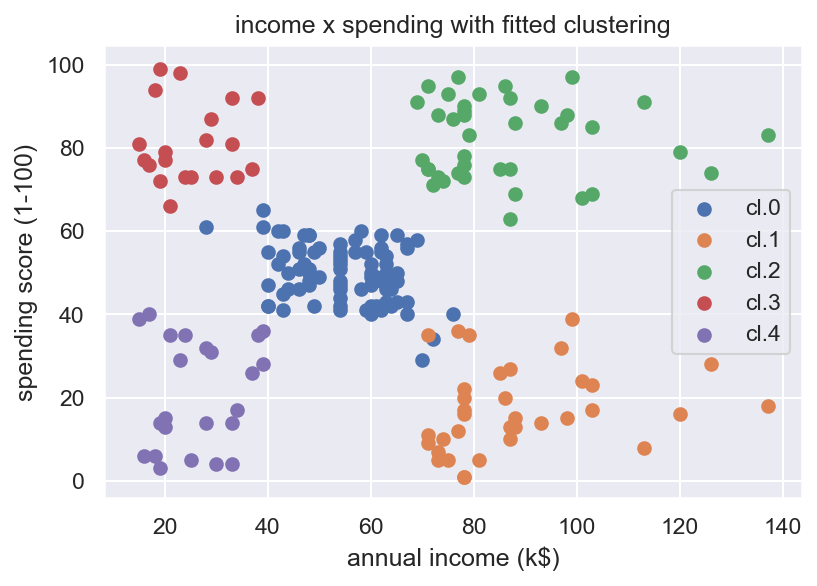

In [7]:
# # Plot the output for each pair
# fig, ax = plt.subplots(2,3, figsize=(14,8), dpi=150)
# pairs = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)] # for visuals
# for i in np.unique(y_hc):
#     # For each cluster, loop over each pair
#     for j, a in enumerate(ax.flatten()):
#         a.scatter(X[y_hc == i, pairs[j][0]], X[y_hc == i, pairs[j][1]], label=f'cl.{i}')

#         a.legend()
# plt.show()

# Plot the output for the main pair ['Annual Income (k$)', 'Spending Score (1-100)']
# Plot the output
fig, ax = plt.subplots(figsize=(6,4),dpi=150)
for i in np.unique(y_hc):
    ax.scatter(X[y_hc == i, 2], X[y_hc == i, 3], label=f'cl.{i}')
ax.legend()
ax.set_xlabel('annual income (k$)')
ax.set_ylabel('spending score (1-100)')
ax.set_title('income x spending with fitted clustering')
plt.show()